<img src="./images/ian-valerio-9UxW_MqBGe4-unsplash.jpg" />

# <center> Car Accident Severity </center>

## Why? (introduction)

### Q: Clearly define a problem or an idea of your choice. Remember that data science problems always target an audience and are meant to help a group of stakeholders solve a problem, so make sure that you explicitly describe your audience and why they would care about your problem.

This work is aimed at society in general and the objective is to generate social awareness regarding traffic accidents, for that reason the language will be simple. Taking into account that traffic accidents represent the death of 1.3 million people around the world each year (*World Health Organization*, link https://www.who.int/features/factfiles/roadsafety/es/), in this This work aims to better understand this type of accident, and evaluate which are the most relevant factors for their occurrence. According to the *World Health Organization*, victims (worldwide) correspond to passersby in 50% of cases, it is also explained that most accidents in general occur due to human errors, however there are also environmental factors, automobile, or the roads. Mainly we are going to use Machine Learning to create a model that classifies accidents according to their level of severity in order to predict the probability of an accident according to new features.


#### in spanish 
Este trabajo esta dirijido para la sociedad en general y el objetivo es generar conciencia social respecto a los accidentes de trafico, por eso motivo el lenguaje será sencillo. Tomando en cuenta que los accidentes de tráfico representan la muerte de 1.3 millones de personas al rededor del mundo cada año (*World Health Organization*, link https://www.who.int/features/factfiles/roadsafety/es/), en este trabajo se pretende comprender mejor este tipo de accidentes, y evaluar cuales son los factores más relevantes para que ocurran. Según *The World Health Organization*, las victimas (a nivel mundial) corresponde a transeuntes en un 50% de los casos, también se explica que la mayoria de los accidentes en genera ocurren por errores humanos, sin embargo también existen factores ambientales, del automovil, o de las carreteras. Principalmente vamos usar Machine Learning para crear un modelo que clasifique los accidentes segun su nivel de severidad para poder predecir la probabilidad de un accidente segun nuevos features. 



## About the data

In [1]:
import numpy as np 
import pandas as pd 

### Q: Describe the data that you will be using to solve the problem or execute your idea. So make sure that you provide adequate explanation and discussion, with examples, of the data that you will be using.

In [2]:
df=pd.read_csv('./Data/Data-Collisions.csv')
print(df.shape)
print(f'The columns names are:', df.columns)

(194673, 38)
The columns names are: Index([&#39;SEVERITYCODE&#39;, &#39;X&#39;, &#39;Y&#39;, &#39;OBJECTID&#39;, &#39;INCKEY&#39;, &#39;COLDETKEY&#39;, &#39;REPORTNO&#39;,
       &#39;STATUS&#39;, &#39;ADDRTYPE&#39;, &#39;INTKEY&#39;, &#39;LOCATION&#39;, &#39;EXCEPTRSNCODE&#39;,
       &#39;EXCEPTRSNDESC&#39;, &#39;SEVERITYCODE.1&#39;, &#39;SEVERITYDESC&#39;, &#39;COLLISIONTYPE&#39;,
       &#39;PERSONCOUNT&#39;, &#39;PEDCOUNT&#39;, &#39;PEDCYLCOUNT&#39;, &#39;VEHCOUNT&#39;, &#39;INCDATE&#39;,
       &#39;INCDTTM&#39;, &#39;JUNCTIONTYPE&#39;, &#39;SDOT_COLCODE&#39;, &#39;SDOT_COLDESC&#39;,
       &#39;INATTENTIONIND&#39;, &#39;UNDERINFL&#39;, &#39;WEATHER&#39;, &#39;ROADCOND&#39;, &#39;LIGHTCOND&#39;,
       &#39;PEDROWNOTGRNT&#39;, &#39;SDOTCOLNUM&#39;, &#39;SPEEDING&#39;, &#39;ST_COLCODE&#39;, &#39;ST_COLDESC&#39;,
       &#39;SEGLANEKEY&#39;, &#39;CROSSWALKKEY&#39;, &#39;HITPARKEDCAR&#39;],
      dtype=&#39;object&#39;)


I will use the *Collisions database - Every year* provided by the *Seattle SDOT Traffic Management Division*. The data is made up of 194673 cases, and contains 38 characteristics which I will separate into four groups:

**a)** There are some **characteristics that are not relevant** for our purpose, for example those that correspond to identification codes (id), there are also repeated characteristics or characteristics with little information.

**b)** There are **features that may not be relevant to apply machine learning techniques but that are relevant to better understand the problem**, for example the location and coordinates.

**c)** Finally there are **features that I don't know if they will really be useful to me**.

**d)** On the other hand, there are those **characteristics that probably have a strong influence on the severity** of the accident. Even these have to be worked on because many contain a numerical code that does not refer to a numerical value but is an identification code for a certain type of accident.



Next I will make an explanation of each of these groups.

### a) Not revelant
OBJECTID (id), INCKEY(id), COLDETKEY(id), REPORTNO(id), EXCEPTRSNCODE(id), SEVERITYCODE.1(repeted), ST_COLCODE (obs SDOT_COLCODE son distints?),SEGLANEKEY (few information), CROSSWALKKEY (few information), HITPARKEDCAR (few information),
SEVERITYDESC(is included in other variable).
I will drop those

### b) Revelant for a better understanding of the problem
X and Y coordinates (i can make a map with those), and LOCATION (Becouse there are some information abour where are the names of the less safe locations, like Battery st. tunnel)

In [3]:
df['LOCATION'].value_counts()

BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB AND AURORA AVE N    276
BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ALASKAN WY VI SB    271
N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N          265
AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST                    254
6TH AVE AND JAMES ST                                              252
                                                                 ... 
31ST AVE SW BETWEEN SW FINDLAY ST AND DEAD END 4                    1
12TH AVE NW AND NW 70TH W ST                                        1
LINDEN AVE N AND WOODLAND S PL N                                    1
MAGNOLIA BLVD W BETWEEN W HOWE C ST AND 34TH CT W                   1
19TH AVE NW AND NW 96TH ST                                          1
Name: LOCATION, Length: 24102, dtype: int64

### c) Maybe relevant
STATUS *mached or not*, \*, <br>
INTKEY *Key that corresponds to the intersection*, \* <br>
EXCEPTRSNDESC *Not Enough Information, or Insufficient Location Information*, it tell me if there enough info
associated with a collision <br>
PEDROWNOTGRNT *Whether or not the pedestrian right of way wasnot granted. (Y/N)*, 4667 Y<br>
SPEEDING *Whether or not speeding was a factor in the collision.*

\*there are other variables that can provide this info

### d) Revelant

SEVERITYCODE *severity*, this is the LABEL!, obse there are just two values: 1 (*Property Damage Only Collision*) and 2 (*Injury Collision*)<br> 
ADDRTYPE *types*: block intersection, alley<br>
COLLISIONTYPE *type of collision*<br> 	
PERSONCOUNT *the total number of people involved in the collision* <br>
PEDCOUNT *number of pedestrians, This is entered by the state.*<br>
PEDCYLCOUNT *the number of bicycles involved in the collision. This is entered by the state.*<br>
VEHCOUNT *the number of vehicles involved in the collision. This is entered by the state.*<br> 
INCDATE	*Just date* <br>
INCDTTM *Date and time* This label can answer the question: In which day or hour are ore probabilities of an accident<br> 
JUNCTIONTYPE *Category of junction at which collision took place, i think thay maybe this is correlated to other variable*<br>
SDOT_COLCODE *The code of the collision description*<br>
SDOT_COLDESC *The description of the collision*<br>
UNDERINFL *Whether or not a driver involved was under the influence of drugs or alcohol.* it is in code!<br>
WEATHER (*clear, raining, overcast, etc.*) <br>
ROADCOND *Road conditions* <br>
LIGHTCOND *light conditions* <br>

In [4]:
print(df['SEVERITYCODE'].value_counts())
print('')
print(df['SEVERITYDESC'].value_counts())

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

Property Damage Only Collision    136485
Injury Collision                   58188
Name: SEVERITYDESC, dtype: int64


In [5]:
df['COLLISIONTYPE'].value_counts()

Parked Car    47987
Angles        34674
Rear Ended    34090
Other         23703
Sideswipe     18609
Left Turn     13703
Pedestrian     6608
Cycles         5415
Right Turn     2956
Head On        2024
Name: COLLISIONTYPE, dtype: int64

In [6]:
df['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              89800
At Intersection (intersection related)               62810
Mid-Block (but intersection related)                 22790
Driveway Junction                                    10671
At Intersection (but not related to intersection)     2098
Ramp Junction                                          166
Unknown                                                  9
Name: JUNCTIONTYPE, dtype: int64

In [7]:
df['WEATHER'].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [8]:
import matplotlib.pyplot as plt

(array([5.54400e+03, 0.00000e+00, 1.31540e+04, 0.00000e+00, 1.14231e+05,
        0.00000e+00, 3.55530e+04, 0.00000e+00, 1.46600e+04, 0.00000e+00,
        6.58400e+03, 0.00000e+00, 2.70200e+03, 0.00000e+00, 0.00000e+00,
        1.13100e+03, 0.00000e+00, 5.33000e+02, 0.00000e+00, 2.16000e+02,
        0.00000e+00, 1.28000e+02, 0.00000e+00, 5.60000e+01, 0.00000e+00,
        3.30000e+01, 0.00000e+00, 2.10000e+01, 0.00000e+00, 1.90000e+01]),
 array([ 0.        ,  0.46666667,  0.93333333,  1.4       ,  1.86666667,
         2.33333333,  2.8       ,  3.26666667,  3.73333333,  4.2       ,
         4.66666667,  5.13333333,  5.6       ,  6.06666667,  6.53333333,
         7.        ,  7.46666667,  7.93333333,  8.4       ,  8.86666667,
         9.33333333,  9.8       , 10.26666667, 10.73333333, 11.2       ,
        11.66666667, 12.13333333, 12.6       , 13.06666667, 13.53333333,
        14.        ]),
 &lt;BarContainer object of 30 artists&gt;)

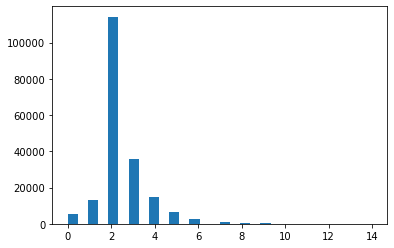

In [9]:
plt.hist(df['PERSONCOUNT'][df['PERSONCOUNT']<15], bins=30)##
# Usually the accidents have two persons 

# Methodology

### Map
For a better espatial understand I will to use a map with the accidents

In [10]:
import folium

In [11]:
COORD=df[['X','Y', 'SEVERITYCODE']]

In [12]:
COORD = COORD.apply (pd.to_numeric, errors='coerce')

In [13]:
num_of_nans=COORD['Y'].isna().sum()
print(f'I found ', num_of_nans, 'values nan')
print(f'That means:', (num_of_nans/len(COORD)).round(3), 'percent of values are nan' )
print('is less than 0.1 percent,  so i wil drope those')

I found  5334 values nan
That means: 0.027 percent of values are nan
is less than 0.1 percent,  so i wil drope those


In [14]:
COORD['X'].dropna(inplace=True)
COORD['Y'].dropna(inplace=True)
#COORD = COORD.reset_index(drop=True)
print(len(COORD))

194673


In [15]:
COORD['Y'].isna().sum()

0

In [16]:
from folium import plugins
latitude=COORD['Y'][15]
longitude=COORD['X'][15]
seattle_map = folium.Map(location = [latitude, longitude], zoom_start = 11)  
accident = plugins.MarkerCluster().add_to(seattle_map)
##Number of pontins===> There are a lot of poins (194673) so i will reduce the number of points becouse it takes time!  
n_o_p=1000
for lat, lng, label, in zip(COORD.Y[0:n_o_p], COORD.X[0:n_o_p], COORD.SEVERITYCODE[0:n_o_p]):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(accident)
#seattle_map.save('seattle_accidents_map.html')
seattle_map

&lt;folium.folium.Map at 0x179f0626388&gt;

I took a screenshot (map with 7000 points), so you can see it on git hub!
<img src="./images/map_d.jpeg" />

## Data Preparation

In [17]:
NO_REVELANT=['OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'EXCEPTRSNCODE', 'SEVERITYCODE.1', 'ST_COLCODE', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR','SEVERITYDESC', 'X', 'Y', 'LOCATION'] #I used X,Y and i don´t need those any more!
MAYBE_RELEVANT=['STATUS', 'INTKEY', 'EXCEPTRSNDESC', 'PEDROWNOTGRNT', 'SPEEDING']
REVELANT=['SEVERITYCODE', 'ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND']

In [18]:
df[REVELANT].head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND
0,2,Intersection,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Overcast,Wet,Daylight
1,1,Block,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",0,Raining,Wet,Dark - Street Lights On
2,1,Block,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",0,Overcast,Dry,Daylight
3,1,Block,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Clear,Dry,Daylight
4,2,Intersection,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,Raining,Wet,Daylight


Veo que necesitare utilizar label encoder pero antes voy a ver si es relevante el dato del tiempo. 

2013/03/27


(array([26338.,     0.,     0., 28556.,     0.,     0., 28778.,     0.,
            0.,     0., 29324.,     0.,     0., 32333.,     0.,     0.,
        27389.,     0.,     0., 21955.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. , 3.3, 3.6,
        3.9, 4.2, 4.5, 4.8, 5.1, 5.4, 5.7, 6. ]),
 &lt;BarContainer object of 20 artists&gt;)

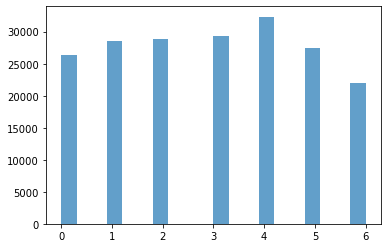

In [19]:
x=df.INCDATE[0].split()
print(x[0])
xx=pd.to_datetime(df['INCDATE'])
xx#.dt.dayofweek
xxx=xx.dt.dayofweek #Day 2 significa miercoles
plt.hist(xxx, bins=20, alpha=0.7)

0:monday, 1:Tuesdat, 2:wednesday (I verify personally), 3:Thursdat, 4:Friday, 5:Saturday, 6:Sunday
The above figure shows the distribution of accidents in the week. Friday is the day with more accidents and sunday is the day with less. 


In [20]:
xxx.value_counts().sort_values(ascending=False)

4    32333
3    29324
2    28778
1    28556
5    27389
0    26338
6    21955
Name: INCDATE, dtype: int64

## Classification

In [21]:
REVELANT=['SEVERITYCODE', 'ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT','JUNCTIONTYPE', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND'] # 'SDOT_COLCODE', 'SDOT_COLDESC'

In [22]:
df[REVELANT].head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND
0,2,Intersection,Angles,2,0,0,2,At Intersection (intersection related),N,Overcast,Wet,Daylight
1,1,Block,Sideswipe,2,0,0,2,Mid-Block (not related to intersection),0,Raining,Wet,Dark - Street Lights On
2,1,Block,Parked Car,4,0,0,3,Mid-Block (not related to intersection),0,Overcast,Dry,Daylight
3,1,Block,Other,3,0,0,3,Mid-Block (not related to intersection),N,Clear,Dry,Daylight
4,2,Intersection,Angles,2,0,0,2,At Intersection (intersection related),0,Raining,Wet,Daylight


In [40]:
uu=df.groupby('COLLISIONTYPE')['SEVERITYCODE'].value_counts() #Quizas puedo poner estos valores en categorias
uu.shape
uu

COLLISIONTYPE  SEVERITYCODE
Angles         1               21050
               2               13624
Cycles         2                4744
               1                 671
Head On        1                1152
               2                 872
Left Turn      1                8292
               2                5411
Other          1               17591
               2                6112
Parked Car     1               45325
               2                2662
Pedestrian     2                5936
               1                 672
Rear Ended     1               19419
               2               14671
Right Turn     1                2347
               2                 609
Sideswipe      1               16103
               2                2506
Name: SEVERITYCODE, dtype: int64

In [64]:
coll1=list(df[df['SEVERITYCODE']==1].groupby('COLLISIONTYPE')['SEVERITYCODE'].value_counts())
coll2=list(df[df['SEVERITYCODE']==2].groupby('COLLISIONTYPE')['SEVERITYCODE'].value_counts())#['COLLISIONTYPE']#.groupby('COLLISIONTYPE')#.value_counts()
print(coll1)
print(coll2)

[21050, 671, 1152, 8292, 17591, 45325, 672, 19419, 2347, 16103]
[13624, 4744, 872, 5411, 6112, 2662, 5936, 14671, 609, 2506]


In [67]:
df[df['SEVERITYCODE']==2].groupby('COLLISIONTYPE')['SEVERITYCODE'].value_counts()

COLLISIONTYPE  SEVERITYCODE
Angles         2               13624
Cycles         2                4744
Head On        2                 872
Left Turn      2                5411
Other          2                6112
Parked Car     2                2662
Pedestrian     2                5936
Rear Ended     2               14671
Right Turn     2                 609
Sideswipe      2                2506
Name: SEVERITYCODE, dtype: int64

In [66]:
df[df['SEVERITYCODE']==1].groupby('COLLISIONTYPE')['SEVERITYCODE'].value_counts()

COLLISIONTYPE  SEVERITYCODE
Angles         1               21050
Cycles         1                 671
Head On        1                1152
Left Turn      1                8292
Other          1               17591
Parked Car     1               45325
Pedestrian     1                 672
Rear Ended     1               19419
Right Turn     1                2347
Sideswipe      1               16103
Name: SEVERITYCODE, dtype: int64

In [62]:
df['COLLISIONTYPE'].unique()

array([&#39;Angles&#39;, &#39;Sideswipe&#39;, &#39;Parked Car&#39;, &#39;Other&#39;, &#39;Cycles&#39;,
       &#39;Rear Ended&#39;, &#39;Head On&#39;, nan, &#39;Left Turn&#39;, &#39;Pedestrian&#39;,
       &#39;Right Turn&#39;], dtype=object)

In [83]:
import plotly.graph_objects as go
coltype=['Angles','Cycles','Head On','Left Turn','Other','Parked Car','Pedestrian','Rear Ended','Right Turn','Sideswipe']#df['COLLISIONTYPE'].unique()
fig = go.Figure()
fig.add_trace(go.Bar(
    x=coltype,
    y=coll1,
    name='Property Damage Only Collision (1)',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=coltype,
    y=coll2,
    name='Injury Collision (2)',
    marker_color='lightsalmon'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.update_layout(template='simple_white',
    autosize=False,
    width=800,
    height=400,
    margin=dict(
        l=10,
        r=0,
        b=5,
        t=20,
        pad=2
    ),
    #paper_bgcolor="LightSteelBlue",
)
fig.update_layout(
    #title="Plot Title",
    yaxis_title="Number of accidents",
    xaxis_title="Collision Type",
    legend_title="Severity",
    font=dict(
        #family="Courier New, monospace",
        size=12,
        #color="RebeccaPurple"
    )
)

fig.show()

Muy interesante que la gente que gira a la izquierda tiene accidentes más que la gente que va a la derecha! 

Coche estacionado 47987
Ángulos 34674
Terminado trasero 34090
Otro 23703
Deslizamiento lateral 18609
Giro a la izquierda 13703
Peatón 6608
Ciclos 5415
Giro a la derecha 2956
De cabeza en 2024

In [25]:
df['ADDRTYPE'].value_counts() #Aqui si usare label encoding

Block           126926
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64

In [26]:
df['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              89800
At Intersection (intersection related)               62810
Mid-Block (but intersection related)                 22790
Driveway Junction                                    10671
At Intersection (but not related to intersection)     2098
Ramp Junction                                          166
Unknown                                                  9
Name: JUNCTIONTYPE, dtype: int64

In [27]:
df['UNDERINFL'].value_counts() #Aca es facil. solo tengo que poner valores numericos que vayan en funcion a lal tipo de influencia

N    100274
0     80394
Y      5126
1      3995
Name: UNDERINFL, dtype: int64

In [28]:
df['WEATHER'].value_counts() #Es facil poner numeros

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [29]:
df['ROADCOND'].value_counts() #Se uede colocar numeros

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [30]:
df['LIGHTCOND'].value_counts() ## Basicamente hay light o dark, no se que significa dawn, y tampoco sé qué haré con los valores perdidos


Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [31]:
df[REVELANT].isna().sum()

SEVERITYCODE        0
ADDRTYPE         1926
COLLISIONTYPE    4904
PERSONCOUNT         0
PEDCOUNT            0
PEDCYLCOUNT         0
VEHCOUNT            0
JUNCTIONTYPE     6329
UNDERINFL        4884
WEATHER          5081
ROADCOND         5012
LIGHTCOND        5170
dtype: int64

In [32]:
df[REVELANT].isnull().sum()

SEVERITYCODE        0
ADDRTYPE         1926
COLLISIONTYPE    4904
PERSONCOUNT         0
PEDCOUNT            0
PEDCYLCOUNT         0
VEHCOUNT            0
JUNCTIONTYPE     6329
UNDERINFL        4884
WEATHER          5081
ROADCOND         5012
LIGHTCOND        5170
dtype: int64

OBS PERSONAL

Quiero incluir los datos de los dias!!! 

OBS voy a dropna a ver si se reducen los valores desconocidos

Tengo que ooglear muchos terminos porque no sé lo que significan! Así quizas podria clasificar mejor.

In [34]:
DF=df[REVELANT]
print(f'Before Dropna\n',DF.shape, DF.isna().sum())

Before Dropna
 (194673, 12) SEVERITYCODE        0
ADDRTYPE         1926
COLLISIONTYPE    4904
PERSONCOUNT         0
PEDCOUNT            0
PEDCYLCOUNT         0
VEHCOUNT            0
JUNCTIONTYPE     6329
UNDERINFL        4884
WEATHER          5081
ROADCOND         5012
LIGHTCOND        5170
dtype: int64


In [35]:
DF.dropna(inplace=True)
print(f'After Dropna\n', DF.shape, DF.isna().sum())

After Dropna
 (182895, 12) SEVERITYCODE     0
ADDRTYPE         0
COLLISIONTYPE    0
PERSONCOUNT      0
PEDCOUNT         0
PEDCYLCOUNT      0
VEHCOUNT         0
JUNCTIONTYPE     0
UNDERINFL        0
WEATHER          0
ROADCOND         0
LIGHTCOND        0
dtype: int64


In [36]:
DF.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND
0,2,Intersection,Angles,2,0,0,2,At Intersection (intersection related),N,Overcast,Wet,Daylight
1,1,Block,Sideswipe,2,0,0,2,Mid-Block (not related to intersection),0,Raining,Wet,Dark - Street Lights On
2,1,Block,Parked Car,4,0,0,3,Mid-Block (not related to intersection),0,Overcast,Dry,Daylight
3,1,Block,Other,3,0,0,3,Mid-Block (not related to intersection),N,Clear,Dry,Daylight
4,2,Intersection,Angles,2,0,0,2,At Intersection (intersection related),0,Raining,Wet,Daylight


Utilizaré la base de datos Collisions—All Years que nos provee SDOT Traffic Management Division de Seattle. Los datos estan conformados por 194673 casos, y contiene 38 features los cuales separaré en cuatro grupos:

a) Hay algunos features que no son relevantes para nuestro proposito por ejemplo aqullos que corresponden a codigos de identificación (id), también existen features repetidos o features con poca información. 

b) Existen features que quizas no son relevantes para aplicar técnicas de machine learning pero que si lo son para comprender mejor el problema, por ejemplo la ubicación y las coordenadas.

b) Por otro lado estan aquellos features que muy probablemente tengan una fuerte influencia sobre la severidad del accidente. Incluso estos hay que trabajarlos porque muchos contienen un codigo numerico que no se refiere a un valor numerico sino es un codigo de identificación para cierto tipo de accidente. 

c) Existen features que quizas no son relevantes para aplicar técnicas de machine learning pero que si lo son para comprender mejor el problema, por ejemplo la ubicación y las coordenadas. 

d) Finalmente existen features que no sé si realmente me serán utiles. 

Acontinuación hare una explicación de cada uno de estos grupos. 

Me interesa: SEVERITYCODE (severity) obs solo tenemos dos posibles valores 1 y 2. ADDRTYPE(Tipo block intersection, alley),SEVERITYDESC son las descripciones de la severidad, COLLISIONTYPE (tipo de colision), 	PERSONCOUNT (The total number of people involved in thecollision), PEDCOUNT(number of pedestrians, This is entered by the state.), PEDCYLCOUNT, VEHCOUNT, INCDATE	(fecha), INCDTTM (fecha y hora), JUNCTIONTYPE (Category of junction at which collision took place, creo que esto esta relacionado con otra variable, junction tal vez), SDOT_COLCODE(esto esta con codigo), SDOT_COLDESC. UNDERINFL(Whether or not a driver involved was under the influence of drugs or alcohol.). WEATHER (clima). ROADCOND(condiciones de la carretera). LIGHTCOND (Condiciones de la luz). 

Ubicaciónes: X e Y son la ubicación (me sirve para graficar.) LOCATION Contiene varias calles (seria util para graficos.)

No me interesa OBJECTID, INCKEY, COLDETKEY, REPORTNO, EXCEPTRSNCODE, SEVERITYCODE.1(esta repetido), ST_COLCODE (obs SDOT_COLCODE son distints?),SEGLANEKEY	 , CROSSWALKKEY, HITPARKEDCAR

No lo sé: STATUS (mached or no), INTKEY(Key that corresponds to the intersection, EXCEPTRSNDESC (Not Enough Information, or Insufficient Location Information    5638)
associated with a collision), PEDROWNOTGRNT(Si el derecho de paso para peatones fue
no garantizado4667Y), SPEEDING Whether or not speeding was a factor in the
collision. 

In [74]:
df['HITPARKEDCAR'].value_counts()

N    187457
Y      7216
Name: HITPARKEDCAR, dtype: int64

In [71]:
df['SDOT_COLCODE'].value_counts()

11    85209
14    54299
16     9928
0      9787
28     8856
24     6518
13     5852
26     4741
18     3104
15     1604
12     1440
51     1312
29      479
21      181
56      180
27      166
54      139
23      124
48      107
31      104
25      102
34       93
64       75
69       69
33       53
55       50
66       23
22       17
32       12
53        9
44        8
61        7
35        6
58        5
68        4
36        4
46        3
52        2
47        1
Name: SDOT_COLCODE, dtype: int64

In [42]:
df[['SEVERITYCODE','SEVERITYCODE.1']].corr()

,SEVERITYCODE,SEVERITYCODE.1
SEVERITYCODE,1.0,1.0
SEVERITYCODE.1,1.0,1.0
